## Matching, Mahalanobis Distance Matching (MDM), e Propensity Score Matching (PSM)

Prof. Daniel de Abreu Pereira Uhr

### Conteúdo

* Causalidade
  * Revisão Breve dos "Directed Acyclic Graphs" (DAGs)
  * Selection Bias em Variáveis Observáveis
  
* Matching (Correspondência)
  * Correspondência Exata
  * Correspondência Aproximada
  * Hipóteses de Identificação para o Matching
  * Aumentando a Dimensão do Espaço de Características
    * Mahalanobis Distance Matching (MDM)
    * Propensity Score Matching (PSM)
    * MDM ou PSM?
* Aplicação na Literatura
* Aplicação em Python
  * PSM
  * MDM


### Referências

* Morgan, S. L., & Winship, C. (2014). Counterfactuals and causal inference: Methods and principles for social research. Cambridge University Press. Capítulo 3.
* Cunningham, S. W. (2013). Causal inference: The mixtape. https://www.scunning.com/mixtape.html
* Pearl, J. (2000). Causality: Models, reasoning, and inference. Cambridge University Press.
* Joshua D. Angrist and Jörn-Steffen Pischke (2009). Mostly Harmless Econometrics: An Empiricist's Companion. Princeton University Press.
* Hirano, K and Imbens, G. (2004). The Propensity Score with Continuous Treatments. In Applied Bayesian Modeling and Causal Inference from Incomplete-Data Perspectives, Andrew Gelman and Xiao-Li Meng (eds.), Wiley, New York.
* Kennedy EH, Ma Z, McHugh MD, Small DS. Nonparametric methods for doubly robust estimation of continuous treatment effects. Journal of the Royal Statistical Society, Series B. 79(4), 2017, pp.1229-1245.
* Moodie E and Stephens DA. Estimation of dose–response functions for longitudinal data using the generalised propensity score. In: Statistical Methods in Medical Research 21(2), 2010, pp.149–166.
* van der Laan MJ and Gruber S. Collaborative double robust penalized targeted maximum likelihood estimation. In: The International Journal of Biostatistics 6(1), 2010.
* van der Laan MJ and Rubin D. Targeted maximum likelihood learning. In: ​U.C. Berkeley Division of Biostatistics Working Paper Series, 2006.
* Marques, M. L. V.; Uhr, D. A. P.; Benevit, B.; Uhr, J. G. Z. An analysis of the relationship between rental housing and adoption of self-generating energy sources in Brazil using matching methodology. Journal of International Development, v. 36, p. 1570-1592, 2024.




**Observações:** O material apresentado aqui é uma adaptação do material de aula do Prof. Daniel de Abreu Pereira Uhr, e não deve ser utilizado para fins comerciais. O material é disponibilizado para fins educacionais e de pesquisa, e não deve ser reproduzido sem a devida autorização do autor. Este material pode conter erros e imprecisões. O autor não se responsabiliza por quaisquer danos ou prejuízos decorrentes do uso deste material. O uso deste material é de responsabilidade exclusiva do usuário. Caso você encontre erros ou imprecisões neste material, por favor, entre em contato com o autor para que possam ser corrigidos. O autor agradece qualquer *feedback* ou sugestão de melhoria.

---


### Causalidade

#### Revisão Breve dos "Directed Acyclic Graphs" (DAGs)

O DAG é uma ferramenta gráfica que permite representar as relações causais entre variáveis. O DAG é uma representação gráfica de um conjunto de equações estruturais. O DAG é acíclico, ou seja, não possui ciclos. O DAG é uma ferramenta poderosa para identificar relações causais.

Vamos supor que queremos avaliar o efeito de uma variável $D$ sobre uma variável $Y$. Entretanto, outra variável $X$ afeta a decisão de $D$ e também afeta $Y$. Neste caso, $X$ é uma variável de confusão (*Confounding Variable*). O DAG é uma ferramenta que permite visualizar as relações causais entre as variáveis. Vejamos:

In [1]:
# Importando o pacote para fazer a visualização do grafo
import graphviz as gr

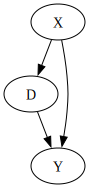

In [2]:
# Grafo indicando a variável de tratamento D, e um confounding X, e a variável de resultado Y
g = gr.Digraph()
g.edge("D", "Y")
g.edge("X", "D")
g.edge("X", "Y")
g

Agora vamos supor que queremos avaliar o efeito de uma variável $D$ sobre uma variável $Y$. Entretanto, outra variável $U$ não observável pelo pesquisador afeta a decisão de $D$ e também afeta $Y$. Neste caso, $U$ também uma variável de confusão (*Confounding Variable*) não observável. Novamente, o DAG é uma ferramenta que permite visualizar as relações causais entre as variáveis. Vejamos:

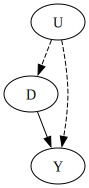

In [3]:
# Grafo indicando a variável de tratamento D, e um confounding U, e a variável de resultado Y
g = gr.Digraph()
g.edge("D", "Y")
g.edge("U", "D", style="dashed")
g.edge("U", "Y", style="dashed")
g

O **viés de seleção** (*Selection Bias*) ocorre quando a amostra utilizada para análise não é representativa da população-alvo devido a um processo de seleção que está relacionado tanto à variável de tratamento quanto ao resultado. Isso pode levar a estimativas enviesadas dos efeitos causais, uma vez que as diferenças observadas entre os grupos podem ser atribuídas ao processo de seleção, e não ao efeito do tratamento em si. Por exemplo:

* **Autoseleção no Tratamento**: Os indivíduos podem optar por participar ou aderir a um determinado tratamento com base em suas características ou preferências pessoais. Ou seja, os participantes que optam por aderir ao tratamento podem ter características diferentes daqueles que optam por não aderir. Isso pode levar a uma amostra de tratamento que não é representativa da população em geral.
  
* **Viés de desistência** (Atrito): Quando os participantes desistem ou abandonam um tratamento antes da conclusão do estudo, isso pode introduzir um viés, especialmente se a desistência estiver relacionada à eficácia ou tolerabilidade do tratamento.


**Definições adicionais importantes**

* **Tratamento "Não Ignorável" (Non-Ignorable Treatment)**: Um tratamento é considerado "não ignorável" quando a **associação entre o tratamento e o resultado não pode ser controlada ou ajustada apenas pelas variáveis observadas**. Nesses casos, há a **presença de confundimento não observado** ou variáveis latentes que afetam tanto a seleção do tratamento quanto o resultado, e não podem ser ignorados ao estimar o efeito causal. 

* **Tratamento "Ignorável" (Ignorable Treatment)**: Um tratamento é considerado "ignorável" se a associação entre o tratamento (a variável de exposição) e o resultado (a variável de interesse) pode ser adequadamente controlada ou ajustada por meio de outras variáveis observadas. Em outras palavras, se as condições de ignorabilidade são satisfeitas, podemos confiar nas estimativas dos efeitos causais mesmo sem observar todas as variáveis relevantes. Isso é fundamental para a inferência causal em estudos observacionais.

#### Selection Bias em Variáveis Observáveis

Pelos exemplos de DAGs vistos anteriormente, podemos perceber que a seleção de tratamento pode ser influenciada por variáveis observáveis e não observáveis. Nestes casos, a seleção pela realização do tratamento é endógena e decore de duas situações:

* **Seleção em Observáveis (Selection on Observables):** A seleção em observáveis refere-se à situação em que a seleção das unidades para um tratamento ($D$) é influenciada por variáveis observáveis ($X$). Em outras palavras, as características ou atributos conhecidos das unidades afetam a probabilidade de serem selecionadas para receber o tratamento. Nesse cenário, é possível controlar o viés resultante ao levar em consideração e ajustar as diferenças nas características observáveis entre os grupos de tratamento e controle. Em outras palavras, os componentes observáveis influenciam a seleção para o tratamento (auto-seleção) e o resultado ($Y$).

* **Seleção em Não-Observáveis (Selection on Unobservables):** A seleção em não-observáveis ocorre quando a seleção das unidades para o tratamento é influenciada por variáveis não observadas que não estão disponíveis para o pesquisador. Essas variáveis não observadas podem estar correlacionadas tanto com a seleção para o tratamento quanto com o resultado, levando a um viés não observável. Em outras palavras, algum(s) componente(s) do termo não observado ($U$) influencia tanto a seleção para o tratamento (auto-seleção) quanto o resultado ($Y$). Nesse cenário, não é possível controlar o viés resultante, mesmo que todas as variáveis observáveis sejam levadas em consideração e ajustadas.

Nessa aula vamos assumir a hipótese de **seleção em observáveis**. E vamos discutir estratégias para controlar o viés de seleção em variáveis observáveis.

### Hipóteses de Identificação para o Matching

Ao realizar o procedimento de correspondência, fazemos três suposições importantes. 

* **Independência condicional** (*unconfoundedness*, *ignorability*, ou *selection on observables*): 
$$ (Y^{1}, Y^{0}) \perp D | X$$

Ou seja, condicional nas covariáveis, a atribuição do tratamento é tão boa quanto um experimento aleatório. Essa é uma suposição forte, que tem maior probabilidade de ser verdadeira quando temos um grande número de covariáveis. Principalmente, na linguagem de Judea Pearl, aquelas que cumprem o critério de *backdoor*.

* **Suporte Comum** (sobreposição, *common support*):	
$$ 0  \leqslant  Pr(D=1|X)  \leqslant  1 $$

Ou seja, para cada valor de $X$, a probabilidade de tratamento deve estar entre 0 e 1. Nenhuma unidade é atribuída a um tratamento ou controle de forma determinística. Significa que, para cada valor de $X$, temos unidades tratadas e não tratadas. A figura a seguir mostra um exemplo possível de área de suporte comum.


<div style="text-align:center;">
    <img src="images\suportecomum.png"  alt="Imagem" style="width: 500px;"/>
</div>


* **Valor de Tratamento Unitário Estável - SUTVA** (*SUTVA - Stable Unit Treatment Value Assumption*):

$$ Y_{i}^{d} \perp D $$

O Valor de Tratamento Unitário Estável (SUTVA - Stable Unit Treatment Value Assumption) é uma das suposições fundamentais em modelos de inferência causal. Ela garante que possamos identificar efeitos causais de forma clara e não enviesada. 

A suposição do SUTVA é composta por dois componentes principais:

* **Não interferência entre unidades:** Isso significa que o resultado de uma unidade (por exemplo, um indivíduo ou uma empresa) não é afetado pelo tratamento que outras unidades recebem. Ou seja, o tratamento de uma unidade não pode interferir no resultado de outra.
* **Valor do tratamento é único:** Significa que o tratamento é bem definido e aplicável da mesma maneira a todas as unidades. Não há variações ou ambiguidade no tipo ou na intensidade do tratamento aplicado.

Quando o SUTVA é válido, podemos dizer que o efeito do tratamento em uma unidade *i* só depende de se a própria unidade *i* recebeu ou não o tratamento, e não de como o tratamento foi aplicado a outras unidades.

Ou seja, o resultado potencial não depende do estado do tratamento. A configuração mais comum do SUTVA é violado quando há vazamento de tratamento, ou seja, quando o tratamento de uma unidade afeta o resultado de outra unidade (Efeitos de *spillover*, ou de rede).

Repare na tabela:


| Unidade (Estagiários) | Idade | Ganhos  | Unidade (Não-estagiários) | Idade | Ganhos  |
|-----------------------|-------|---------|--------------------------|-------|---------|
| 1                     | 18    | 9500    | 1                        | 20    | 8500    |
| 2                     | 29    | 12250   | 2                        | 27    | 10075   |
| 3                     | 24    | 11000   | 3                        | 21    | 8725    |
| 4                     | 27    | 11750   | 4                        | 39    | 12775   |
| 5                     | 33    | 13250   | 5                        | 38    | 12550   |
| 6                     | 22    | 10500   | 6                        | 29    | 10525   |
| 7                     | 19    | 9750    | 7                        | 39    | 12775   |
| 8                     | 20    | 10000   | 8                        | 33    | 11425   |
| 9                     | 21    | 10250   | 9                        | 24    | 9400    |
| 10                    | 30    | 12500   | 10                       | 30    | 10750   |
| 11                    | 33    | 11425   |                          |       |         |
| 12                    | 36    | 12100   |                          |       |         |
| 13                    | 22    | 8950    |                          |       |         |
| 14                    | 18    | 8050    |                          |       |         |
| 15                    | 43    | 13675   |                          |       |         |
| 16                    | 39    | 12775   |                          |       |         |
| 17                    | 19    | 8275    |                          |       |         |
| 18                    | 30    | 9000    |                          |       |         |
| 19                    | 51    | 15475   |                          |       |         |
| 20                    | 48    | 14800   |                          |       |         |
| **Média**             | **24,3** | **11.075** | **Média**                | **31,95** | **11.101,25** |





#### Hipóteses de Identificação para o Matching
 


### Aumentando a Dimensão do Espaço de Características

A correspondência em uma única covariável é simples porque a distância é medida em termos dos próprios valores da covariável ($X$). Por exemplo, a distância em idade é simplesmente o quão perto em anos, meses ou dias uma pessoa está de outra pessoa. Mas e se tivermos várias covariáveis ​​necessárias para a correspondência? Digamos, idade e renda. Uma mudança de 1 ponto na idade é muito diferente de uma mudança de 1 ponto no logaritmo da renda, sem mencionar que agora estamos medindo a distância em duas, e não em uma, dimensões. **Quando o número de covariáveis ​​correspondentes é maior que um, precisamos de uma nova definição de distância para medir a proximidade**. 


#### Mahalanobis Distance Matching (MDM)

**Distância Euclidiana**

Começamos com a medida de distância mais simples, a **distância euclidiana**.

$$ || X_{i} - X_{j} || = \sqrt{(X_{i}- X_{j})´(X_{i}- X_{j})} $$

$$ || X_{i} - X_{j} || = \sqrt{\sum_{k=1}^{K}(X_{i,k}- X_{j,k})^{2}} $$

O problema com esta medida de distância é que a própria medida de distância depende da escala das próprias variáveis. Por esta razão, os pesquisadores normalmente usarão alguma modificação da distância euclidiana, como a distância euclidiana normalizada , ou usarão uma distância alternativa totalmente diferente. 

**Distância Euclidiana Normalizada**

A distância euclidiana normalizada é uma distância comumente usada, e o que a torna diferente é que a distância de cada variável é dimensionada pela variância da variável. A distância é medida como:

$$ || X_{i} - X_{j} || = \sqrt{(X_{i}- X_{j})´ \hat{V}^{-1} (X_{i}- X_{j})} $$

onde 

$$ \hat{V}^{-1} = \left [ \begin{array}{ccc}
\hat{\sigma}_{1}^{2} & 0 & \dots & 0 \\
0 & \hat{\sigma}_{2}^{2} & \dots & 0 \\
\vdots & \vdots & \ddots & \vdots \\
0 & 0 & \dots & \hat{\sigma}_{K}^{2} \\
\end{array} \right ] $$

Observe que a distância euclidiana normalizada é igual a:

$$ || X_{i} - X_{j} || = \sqrt{\sum_{k=1}^{K}\left ( \frac{X_{i,k}- X_{j,k}}{\hat{\sigma}_{k}^{2}} \right )} $$

Assim, se houver mudanças na escala de $X$, essas mudanças também afetam sua variância e, portanto, a distância euclidiana normalizada não muda.


**Distância de Mahalanobis**

Finalmente, existe a distância de Mahalanobis , que, como a medida de distância euclidiana normalizada, é uma métrica de distância invariante à escala. Isso é:

$$ || X_{i} - X_{j} || = \sqrt{(X_{i}- X_{j})´ \hat{\Sigma}_{X}^{-1} (X_{i}- X_{j})} $$

onde $\Sigma_{X}^{-1}$ é a matriz de covariância da amostra de $X$.

Basicamente, mais de uma covariável cria o problema da maldição da dimensionalidade, e, também torna a medição da distância mais difícil. Tudo isso cria alguns desafios para encontrar uma boa correspondência nos dados. Como você pode ver em cada uma dessas fórmulas de distância, às vezes haverá discrepâncias de correspondência.

Às vezes $ X_{i} \neq X_{j} $. O que isto significa? Isso significa que alguma unidade $i$ foi combinado com alguma unidade $j$ com base em um valor de covariável semelhante de $X=x$. Talvez unidade $i$ tem 25 anos, mas unidade $j$ tem 26 anos. A diferença é 1. Às vezes as discrepâncias são pequenas, às vezes zero, às vezes grandes. Mas, à medida que se afastam de zero, tornam-se mais problemáticos para a nossa estimativa e introduzem enviesamentos.

**Quanto maior a dimensão, maior a probabilidade de discrepâncias correspondentes e mais dados serão necessários. Então você pode levar isso ao banco – muito provavelmente, seu problema de correspondência requer um grande conjunto de dados para minimizar as discrepâncias de correspondência.**


**A Ideia do Estimador de Mahalanobis Distance Matching (MDM)**

O MDM funciona emparelhando unidades próximas com base em uma distância chamada distância de Mahalanobis, que você pode imaginar como uma distância euclidiana sem escala. 

Para que duas unidades tenham uma distância de Mahalanobis de 0, elas devem ter valores covariáveis ​​idênticos. Quanto mais diferentes os valores das covariáveis, maior a distância de Mahalanobis. 

A ideia é que, se você encontrar unidades de controle próximas às unidades tratadas na distância de Mahalanobis, cada par terá valores de covariáveis ​​semelhantes, e a distribuição das covariáveis ​​nos grupos de tratamento na amostra pareada será semelhante.



<div style="text-align:center;">
    <img src="images\maha1.png"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\maha2.png"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\maha3.png"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\maha4.png"  alt="Imagem" style="width: 500px;"/>
</div>


<div style="text-align:center;">
    <img src="images\maha5.png"  alt="Imagem" style="width: 500px;"/>
</div>


#### Propensity Score Matching 

Existem várias maneiras de alcançar a estratégia de condicionamento implícita no critério backdoor, e discutimos várias delas. Mas um método popular foi desenvolvido por Donald Rubin em meados da década de 1970 até o início da década de 1980, chamado **método de escore de propensão** (*Propensity Score Matching* - Rubin 1977 ; Rosenbaum e Rubin 1983 ).

O escore de propensão é semelhante em muitos aspectos ao emparelhamento de covariáveis ​​do vizinho mais próximo de Abadie e Imbens (2006) e à subclassificação. É um método muito popular, especialmente nas ciências médicas, para abordar a seleção em observáveis, e também ganhou uso entre os economistas ( Dehejia e Wahba 2002 ) .

Apesar da excitação inicial causada por Dehejia e Wahba ( 2002 ) , o entusiasmo subsequente foi mais moderado ( Smith e Todd 2001 , 2005 ; King e Nielsen 2019 ). Como tal, a correspondência do escore de propensão não tem sido tão amplamente adotada entre os economistas como em outros métodos não experimentais, como a descontinuidade de regressão ou a diferença em diferenças. A razão mais comum apresentada para isto é que os economistas são muitas vezes céticos de que a CIA possa ser alcançada em qualquer conjunto de dados – quase como um artigo de fé. 

Isto ocorre porque, para muitas aplicações, os economistas, como grupo, **estão geralmente mais preocupados com a seleção de inobserváveis ​​do que com a seleção de observáveis** ​​e, como tal, recorrem a métodos de correspondência com menos frequência. Mas sou agnóstico quanto à questão de saber se a CIA detém ou não a sua aplicação específica. Não há razão teórica para rejeitar um procedimento concebido para estimar efeitos causais sobre algum princípio ad hoc que se sustenta devido a um palpite. 

Somente o conhecimento prévio e a profunda familiaridade com os detalhes institucionais da sua aplicação podem lhe dizer qual é a estratégia de identificação apropriada e, na medida em que o critério backdoor pode ser atendido, então os métodos de correspondência podem ser perfeitamente apropriados. E se não for possível, então a correspondência é inadequada. 

**Propensity Score**

O "escore de propensão" ou "índice de propensão" é a probabilidade de um indivíduo ser tratado, dado um conjunto de covariáveis. O escore de propensão é uma pontuação que resume as covariáveis ​​em um único número. A ideia é que, se você conhece o escore de propensão de um indivíduo, você conhece todas as informações relevantes sobre as covariáveis ​​que determinam a probabilidade de tratamento.


**Hipóteses de Identificação**

* **Independência condicional** (*unconfoundedness*, *ignorability*, ou *selection on observables*).
  * $(Y(0), Y(1)) \perp D_{i} | X_{i}$ não é testável. Como vimos anteriormente, a suposição de independência condicional significa simplesmente que o critério backdoor é atendido nos dados por meio do condicionamento em um vetor $X$.

* **Suporte Comum** (sobreposição, common support):	
  * $0 < Pr(D=1|X) < 1$ para todo $X$. Isto significa simplesmente que, para qualquer probabilidade, deve haver unidades tanto no grupo de tratamento como no grupo de controle.

* **Valor de Tratamento Unitário Estável** (SUTVA - Stable Unit Treatment Value Assumption):
  * $ Y_{i}^{d} \perp D $


**Teorema do escore de propensão**

A partir das hipóteses de identificação, obtemos o **teorema do escore de propensão**, que afirma que sob a CIA, 

$$(Y(0), Y(1)) \perp D_{i} | X_{i}$$

se a suposição de ignorabilidade forte for válida, é suficiente condicionar a análise à probabilidade de tratamento, o escore de propensão , para ter independência condicional:

$$(Y(0), Y(1)) \perp D_{i} | p(X)$$

onde $p(X)$ é o indice de propensão. Isso significa que para alcançar a independência, assumindo a CIA, basta condicionar no escore de propensão. O condicionamento no escore de propensão é suficiente para haver independência entre o tratamento e os resultados potenciais.

O resultado de Rosenbaum e Rubin (1983) é incrivelmente poderoso e prático, uma vez que o índice de propensão é uma variável unidimensional , enquanto $X$
pode ter muitas dimensões.

O teorema do escore de propensão diz que **você só precisa controlar as covariáveis ​​que determinam a probabilidade de uma unidade receber o tratamento**. Mas também diz algo mais do que isso. Tecnicamente, diz que a única covariável à qual você precisa condicionar é o índice de propensão. Todas as informações do $X$. A matriz foi resumida em um único número: o índice de propensão.

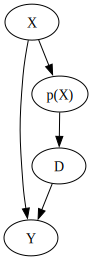

In [4]:
# Importando o pacote
import graphviz as gr

# Gráfico indicando as variáveis e suas relações
g = gr.Digraph()
g.edge("D", "Y")
g.edge("p(X)", "D")
g.edge("X", "Y")
g.edge("X", "p(X)")
g

Então ao condicionarmos no escore de propensão fechamos um caminho de porta dos fundos e obtemos estimativas não enviesadas do efeito causal. Mas como podemos estimar o escore de propensão?

**A Ideia do Estimador de Correspondência pelo Escore de Propensão**

As versões de amostra do ATE e do ATT são obtidas por um procedimento de estimativa em duas etapas. Na primeira etapa, o pesquisador estima o escore de propensão usando logit ou probit. Na segunda etapa, o pesquisador utiliza a pontuação estimada para produzir versões amostrais de um dos estimadores médios do efeito do tratamento.

Podemos utilizar algumas estratégias a partir do escore de propensão:
* Aproximar os indivíduos do grupo de controle aos indivíduos do grupo de tratados.
* Aproximar apenas um indivíduo do grupo de controle para cada indivíduo do grupo de tratados.
* Utilizar o escore de propensão como um peso para estimar o ATT e o ATE (Propensity Score Weighting).



**Exemplo**


<div style="text-align:center;">
    <img src="images\psm1.png"  alt="Imagem" style="width: 500px;"/>
</div>

<div style="text-align:center;">
    <img src="images\psm2.png"  alt="Imagem" style="width: 500px;"/>
</div>

<div style="text-align:center;">
    <img src="images\psm3.png"  alt="Imagem" style="width: 500px;"/>
</div>

<div style="text-align:center;">
    <img src="images\psm4.png"  alt="Imagem" style="width: 500px;"/>
</div>

<div style="text-align:center;">
    <img src="images\psm5.png"  alt="Imagem" style="width: 500px;"/>
</div>

<div style="text-align:center;">
    <img src="images\psm6.png"  alt="Imagem" style="width: 500px;"/>
</div>

O PSM funciona emparelhando unidades que possuem escores de propensão semelhantes (probabilidades). 

Os escores de propensão reduzem toda a distribuição de covariáveis ​​em uma única dimensão; isso significa que duas unidades com escores de propensão semelhantes não necessariamente terão valores de covariáveis ​​semelhantes. 
No entanto, devido às propriedades teóricas de equilíbrio do escore de propensão, o PSM ainda pode produzir amostras equilibradas, mesmo que qualquer par de unidades combinadas individuais possa não ter valores covariáveis ​​semelhantes.

Segundo King e Nielsen (2019), o procedimento de escore de propensão aproximou a amostra observacional inicial à uma amostra randomizada.

**É importante notar que dependendo da métrica de aproximação do escore de propensão, temos uma redução maior ou menor na nossa base de dados.**

Existem várias métricas para limitar a redução da base de dados, como:
* Nearest Neighbor Matching (NN): É possível limitar a redução da base de dados ao escolher o número de vizinhos mais próximos que serão utilizados para a correspondência.
* Caliper Matching: É possível limitar a redução da base de dados ao escolher o caliper de correspondência. O caliper é uma restrição que impede que as unidades sejam emparelhadas se a diferença entre os escores de propensão for muito grande.
* Kernel Matching: É possível limitar a redução da base de dados ao escolher o tamanho da janela de kernel.
* Radius Matching: É possível limitar a redução da base de dados ao escolher o raio de correspondência.


Mesmo que a amostra de grupo de controle fosse muito superior aos tratados, o procedimento não garante que serão escolhidos os indivíduos com matching perfeito, entretanto será escolhida a amostra que aproxima à aleatorização.



**MDM vs PSM?**

King & Nielsen (2019) argumentam que o PSM pode produzir estimativas frágeis e não robustas que podem variar muito dependendo do modelo usado. 
Em particular, se você descartar progressivamente unidades que estão distantes umas das outras (ou seja, impondo um calibre cada vez mais apertado), eventualmente o equilíbrio começa a piorar com o PSM, mesmo que as unidades próximas no PS permaneçam. 
Eles chamam isso de paradoxo do propensity score, que é a motivação para recomendar métodos potencialmente mais robustos como MDM que aproximam diretamente no espaço de covariáveis. 

Então, devemos evitar o PSM e manter o MDM? 

Não. 

Rippolone et al. (2018) investigaram o impacto do paradoxo do propensity score em dados epidemiológicos reais. Eles descobriram que, embora o paradoxo ocorresse com alguns dados, não era problemático até que valores extremos de calibre fossem usados, muito além do que seria recomendado. 
O PSM geralmente rendeu bom equilíbrio nas covariáveis. Em contraste, o MDM produziu um equilíbrio ruim em um conjunto de dados, às vezes até pior com nenhuma correspondência.


### Aplicação na Literatura

Vejamos um artigo recente que aplica PSM: MARQUES, M. L. V. ; UHR, D. A. P. ; BENEVIT, B. ; UHR, J. G. Z. An analysis of the relationship between rental housing and adoption of self-generating energy sources in Brazil using matching methodology. **Journal of International Development**, v. 36, p. 1570-1592, 2024.

É importante verificar a estrutura de apresentação do artigo, como a metodologia e explorada, e posteriormente a apresentação dos resultados e estratégia de Robustez. Entendo que esse artigo é um ótimo modelo de como apresentar um estudo que utiliza o PSM.

<div style="text-align:center;">
    <img src="images\Artigo_PSM.png"  alt="Imagem" style="width: 500px;"/>
</div>




### Aplicação em Python

#### PSM

Vamos utilizar o Python, e entender um pouco sobre possíveis aplicações do PSM. Vamos utilizar nosso exemplo das gestantes que fumam e não fumam. A ideia é entender como o PSM pode ser utilizado para estimar o efeito do tratamento. As aplicações aqui não são exaustivas, e a ideia é apenas ilustrar como o PSM pode ser utilizado.




Vamos carregar o data frame e construir algumas variáveis para a análise.

In [5]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from causalinference import CausalModel

In [6]:
# DataFrame
df = pd.read_stata("https://github.com/Daniel-Uhr/data/raw/main/cattaneo2.dta")

# Criar a variável de resultado
df['Y'] = df['bweight']

# Crie a variável 'Treated' com valor inicial de 0
df['Treated'] = 0
# Recodifique 'Treated' para 1 se 'mbsmoke' for igual a 'smoker'
df.loc[df['mbsmoke'] == 'smoker', 'Treated'] = 1

df['casada'] = 0
df.loc[df['mmarried']=='married', 'casada'] = 1

# gerar uma variável de contagem de linhas iniciando em 1
df['id'] = np.arange(len(df)) + 1

# Conjunto de Covariáveis X
X = ['casada', 'mage', 'medu']

In [7]:
cm = CausalModel(
    Y=df["Y"].values, 
    D=df["Treated"].values, 
    X=df[['casada', 'mage', 'medu']].values
)

In [8]:
cm.est_via_ols(adj=1)
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -219.323     22.438     -9.775      0.000   -263.302   -175.345



In [9]:
print(cm.summary_stats)


Summary Statistics

                      Controls (N_c=3778)         Treated (N_t=864)             
       Variable         Mean         S.d.         Mean         S.d.     Raw-diff
--------------------------------------------------------------------------------
              Y     3412.912      570.687     3137.660      560.893     -275.252

                      Controls (N_c=3778)         Treated (N_t=864)             
       Variable         Mean         S.d.         Mean         S.d.     Nor-diff
--------------------------------------------------------------------------------
             X0        0.751        0.432        0.473        0.500       -0.595
             X1       26.810        5.645       25.167        5.301       -0.300
             X2       12.930        2.534       11.639        2.168       -0.547



**Propensity Score Matching** - nearest-neighborhood matching

* 'inv' (variância inversa): Especifica que a matriz de ponderação usada para calcular as distâncias é a inversa da matriz de covariância. Isso significa que variáveis com maior variância têm menor peso no cálculo da distância, e variáveis com menor variância têm maior peso.
* 1 (um match por tratado): Isso significa que cada indivíduo tratado será pareado com exatamente um indivíduo do grupo de controle (não tratado).
* Se definido como True, o método tentará ajustar o viés residual através de uma regressão linear adicional. Isso pode ser útil se houver preocupação de que o matching não tenha balanceado completamente as covariáveis entre os grupos tratado e controle.

In [10]:
# Estimates average treatment effects using nearest-neighborhood matching.
cm.est_via_matching(weights='inv', matches=1, bias_adj=False)
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -219.323     22.438     -9.775      0.000   -263.302   -175.345

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -203.744     34.020     -5.989      0.000   -270.424   -137.064
           ATC   -199.569     37.967     -5.256      0.000   -273.984   -125.154
           ATT   -222.002     30.031     -7.393      0.000   -280.862   -163.142



* bias_adj=True: O método realiza um ajuste adicional após o matching para corrigir possíveis vieses remanescentes que surgem devido a essas diferenças residuais nas covariáveis.

In [11]:
# Estimates average treatment effects using 5 nearest-neighborhood matching.
cm.est_via_matching(weights='inv', matches=5, bias_adj=True)
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -219.323     22.438     -9.775      0.000   -263.302   -175.345

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -219.043     28.612     -7.655      0.000   -275.123   -162.962
           ATC   -217.321     31.351     -6.932      0.000   -278.768   -155.874
           ATT   -226.572     25.105     -9.025      0.000   -275.777   -177.366



#### Mahalanobis Distance Matching (MDM)

In [12]:
cm.est_via_matching(matches=1, weights='maha')
print(cm.estimates)


Treatment Effect Estimates: OLS

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -219.323     22.438     -9.775      0.000   -263.302   -175.345

Treatment Effect Estimates: Matching

                     Est.       S.e.          z      P>|z|      [95% Conf. int.]
--------------------------------------------------------------------------------
           ATE   -201.341     34.026     -5.917      0.000   -268.032   -134.651
           ATC   -196.748     37.985     -5.180      0.000   -271.199   -122.297
           ATT   -221.426     29.996     -7.382      0.000   -280.218   -162.633



### Considerações Finais	

Nessa aula vimos como o PSM pode ser utilizado para estimar o efeito do tratamento. A ideia é que o PSM pode ser utilizado para aproximar a amostra observacional à uma amostra randomizada. Aplicamos o PSM em um exemplo de gestantes que fumam e não fumam, e vimos como o PSM pode ser utilizado para estimar o efeito do tratamento. Além disso vimos que é um método utilizado na literatura recente. 